In [2]:
import gymnasium as gym
import numpy as np
import time

# Create the environment with rendering enabled
env = gym.make('CartPole-v1', render_mode='human')

# Set number of episodes and time steps
episodeNumber = 5
timeSteps = 100

for episodeIndex in range(episodeNumber):
    print(f"Episode: {episodeIndex + 1}")

    # Reset the environment at the start of each episode
    state, _ = env.reset()

    # List to store observations
    appendedObservations = []

    for timeIndex in range(timeSteps):
        print(f"  Time step: {timeIndex + 1}")

        # Take a random action
        random_action = env.action_space.sample()

        # Step through the environment
        observation, reward, terminated, truncated, info = env.step(random_action)

        # Save the observation
        appendedObservations.append(observation)

        # Optional sleep to see rendering smoothly
        time.sleep(0.05)

        # End episode if terminated or truncated
        if terminated or truncated:
            print("  Episode ended early.")
            break

# Close the environment after all episodes are complete
env.close()


Episode: 1
  Time step: 1
  Time step: 2
  Time step: 3
  Time step: 4
  Time step: 5
  Time step: 6
  Time step: 7
  Time step: 8
  Time step: 9
  Time step: 10
  Time step: 11
  Time step: 12
  Time step: 13
  Time step: 14
  Episode ended early.
Episode: 2
  Time step: 1
  Time step: 2
  Time step: 3
  Time step: 4
  Time step: 5
  Time step: 6
  Time step: 7
  Time step: 8
  Time step: 9
  Time step: 10
  Time step: 11
  Time step: 12
  Time step: 13
  Time step: 14
  Time step: 15
  Time step: 16
  Time step: 17
  Time step: 18
  Time step: 19
  Time step: 20
  Time step: 21
  Time step: 22
  Time step: 23
  Time step: 24
  Time step: 25
  Time step: 26
  Time step: 27
  Time step: 28
  Time step: 29
  Time step: 30
  Time step: 31
  Time step: 32
  Time step: 33
  Time step: 34
  Time step: 35
  Time step: 36
  Time step: 37
  Time step: 38
  Time step: 39
  Time step: 40
  Time step: 41
  Time step: 42
  Time step: 43
  Time step: 44
  Time step: 45
  Time step: 46
  Time step: 

In [ ]:
import gymnasium as gym
import numpy as np
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Hyperparameters
EPISODES = 100
GAMMA = 0.95
MEMORY_SIZE = 2000
BATCH_SIZE = 32
EPSILON = 1.0
EPSILON_MIN = 0.1
EPSILON_DECAY = 0.995
TARGET_UPDATE = 10
LEARNING_RATE = 0.001

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.epsilon = EPSILON
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=LEARNING_RATE))
        return model

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state, verbose=0)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state, verbose=0)
                target[0][action] = reward + GAMMA * np.amax(t[0])
            self.model.fit(state, target, epochs=1, verbose=0)

        if self.epsilon > EPSILON_MIN:
            self.epsilon *= EPSILON_DECAY

# Main function
if __name__ == "__main__":
    env = gym.make('CartPole-v1', render_mode=None)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)

    for episode in range(EPISODES):
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for time_t in range(500):  # Max steps per episode
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:
                print(f"Episode: {episode+1}/{EPISODES}, Score: {total_reward}, Epsilon: {agent.epsilon:.2f}")
                break

            if len(agent.memory) > BATCH_SIZE:
                agent.replay(BATCH_SIZE)

        if episode % TARGET_UPDATE == 0:
            agent.update_target_model()

    env.close()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode: 1/100, Score: 17.0, Epsilon: 1.00
Episode: 2/100, Score: 17.0, Epsilon: 0.99
Episode: 3/100, Score: 41.0, Epsilon: 0.81
Episode: 4/100, Score: 15.0, Epsilon: 0.76
Episode: 5/100, Score: 16.0, Epsilon: 0.70
Episode: 6/100, Score: 12.0, Epsilon: 0.67
Episode: 7/100, Score: 12.0, Epsilon: 0.63
Episode: 8/100, Score: 12.0, Epsilon: 0.60
Episode: 9/100, Score: 11.0, Epsilon: 0.57
Episode: 10/100, Score: 13.0, Epsilon: 0.53
Episode: 11/100, Score: 13.0, Epsilon: 0.50
Episode: 12/100, Score: 12.0, Epsilon: 0.48
Episode: 13/100, Score: 14.0, Epsilon: 0.45
Episode: 14/100, Score: 10.0, Epsilon: 0.43
Episode: 15/100, Score: 13.0, Epsilon: 0.40
Episode: 16/100, Score: 16.0, Epsilon: 0.37
Episode: 17/100, Score: 13.0, Epsilon: 0.35
Episode: 18/100, Score: 11.0, Epsilon: 0.33
Episode: 19/100, Score: 9.0, Epsilon: 0.32
Episode: 20/100, Score: 10.0, Epsilon: 0.31
Episode: 21/100, Score: 13.0, Epsilon: 0.29
Episode: 22/100, Score: 10.0, Epsilon: 0.28
Episode: 23/100, Score: 9.0, Epsilon: 0.26


Training with regularization: None
Reg: None, Ep: 1/5, Score: 11.0, Epsilon: 1.00
Reg: None, Ep: 2/5, Score: 14.0, Epsilon: 1.00
Reg: None, Ep: 3/5, Score: 8.0, Epsilon: 1.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reg: None, Ep: 4/5, Score: 19.0, Epsilon: 0.91
Reg: None, Ep: 5/5, Score: 15.0, Epsilon: 0.85

Training with regularization: l1
Reg: l1, Ep: 1/5, Score: 15.0, Epsilon: 1.00
Reg: l1, Ep: 2/5, Score: 18.0, Epsilon: 1.00
Reg: l1, Ep: 3/5, Score: 44.0, Epsilon: 0.81
Reg: l1, Ep: 4/5, Score: 21.0, Epsilon: 0.73
Reg: l1, Ep: 5/5, Score: 19.0, Epsilon: 0.67

Training with regularization: l2
Reg: l2, Ep: 1/5, Score: 10.0, Epsilon: 1.00
Reg: l2, Ep: 2/5, Score: 15.0, Epsilon: 1.00
Reg: l2, Ep: 3/5, Score: 13.0, Epsilon: 0.98
Reg: l2, Ep: 4/5, Score: 22.0, Epsilon: 0.88
Reg: l2, Ep: 5/5, Score: 12.0, Epsilon: 0.83

Training with regularization: dropout
Reg: dropout, Ep: 1/5, Score: 17.0, Epsilon: 1.00
Reg: dropout, Ep: 2/5, Score: 14.0, Epsilon: 1.00
Reg: dropout, Ep: 3/5, Score: 18.0, Epsilon: 0.92
Reg: dropout, Ep: 4/5, Score: 12.0, Epsilon: 0.87
Reg: dropout, Ep: 5/5, Score: 20.0, Epsilon: 0.79


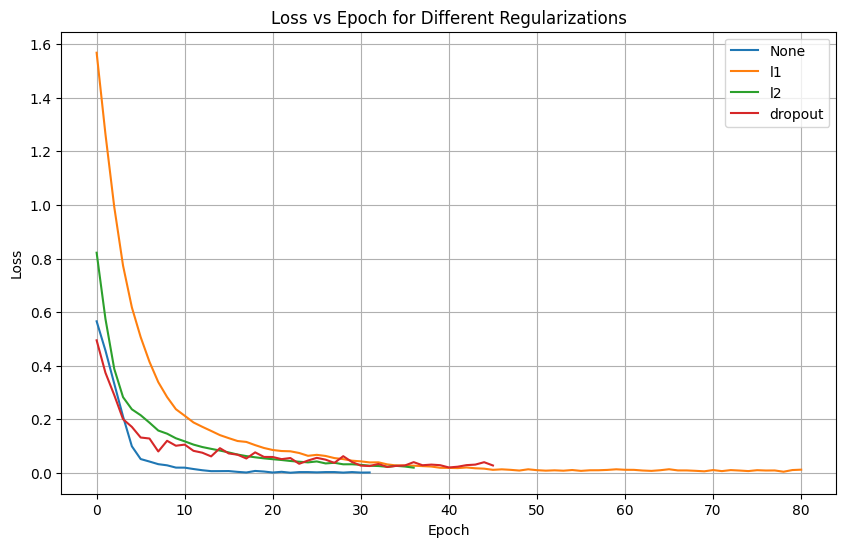

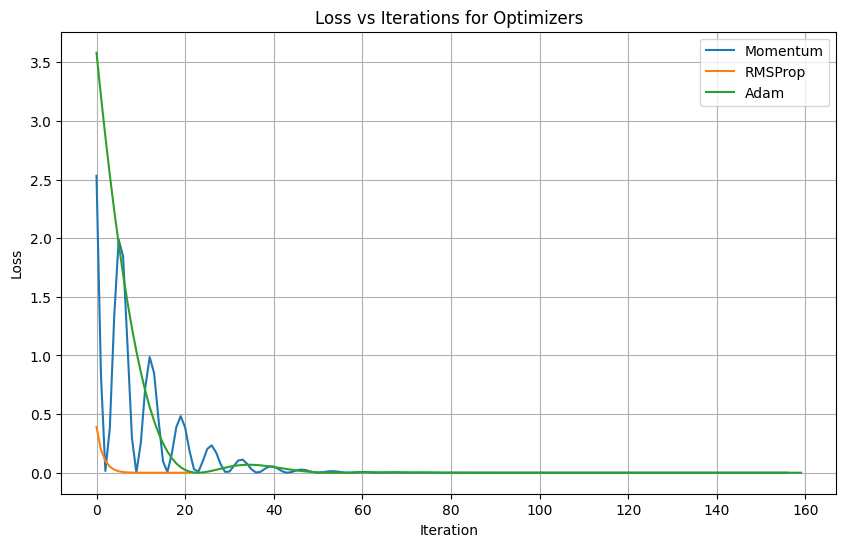

Momentum converged in 157 iterations
RMSProp converged in 22 iterations
Adam converged in 160 iterations


In [1]:


import gymnasium as gym
import numpy as np
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Constants
EPISODES = 5
GAMMA = 0.95
MEMORY_SIZE = 2000
BATCH_SIZE = 32
EPSILON = 1.0
EPSILON_MIN = 0.1
EPSILON_DECAY = 0.995
TARGET_UPDATE = 10
LEARNING_RATE = 0.001

class DQNAgent:
    def __init__(self, state_size, action_size, regularization=None):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.epsilon = EPSILON
        self.model = self._build_model(regularization)
        self.target_model = self._build_model(regularization)
        self.update_target_model()
        self.loss_history = []

    def _build_model(self, regularization):
        model = Sequential()

        if regularization == 'l1':
            reg = l1(0.01)
        elif regularization == 'l2':
            reg = l2(0.01)
        else:
            reg = None

        model.add(Dense(24, input_dim=self.state_size, activation='relu', kernel_regularizer=reg))
        if regularization == 'dropout':
            model.add(Dropout(0.2))
        model.add(Dense(24, activation='relu', kernel_regularizer=reg))
        if regularization == 'dropout':
            model.add(Dropout(0.2))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=LEARNING_RATE))
        return model

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])

    def replay(self):
        minibatch = random.sample(self.memory, BATCH_SIZE)
        total_loss = 0
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state, verbose=0)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state, verbose=0)
                target[0][action] = reward + GAMMA * np.amax(t[0])
            history = self.model.fit(state, target, epochs=1, verbose=0)
            total_loss += history.history['loss'][0]

        self.loss_history.append(total_loss / len(minibatch))

        if self.epsilon > EPSILON_MIN:
            self.epsilon *= EPSILON_DECAY

# Train and plot function
def train_and_plot(regularization):
    env = gym.make('CartPole-v1', render_mode=None)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size, regularization)

    for episode in range(EPISODES):
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for _ in range(500):
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:
                break

            if len(agent.memory) > BATCH_SIZE:
                agent.replay()

        if episode % TARGET_UPDATE == 0:
            agent.update_target_model()

        print(f"Reg: {regularization}, Ep: {episode+1}/{EPISODES}, Score: {total_reward}, Epsilon: {agent.epsilon:.2f}")

    env.close()
    return agent.loss_history

# Plotting
reg_types = [None, 'l1', 'l2', 'dropout']
loss_data = {}

for reg in reg_types:
    print(f"\nTraining with regularization: {reg if reg else 'None'}")
    losses = train_and_plot(reg)
    loss_data[reg if reg else 'None'] = losses

plt.figure(figsize=(10, 6))
for key, values in loss_data.items():
    plt.plot(values, label=f'{key}')
plt.title("Loss vs Epoch for Different Regularizations")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



import seaborn as sns


def f(m):
    return m**2 - 2*m + 1

def grad(m):
    return 2*m - 2



def momentum_optimizer(beta=0.9, lr=0.1):
    m = np.random.randn()
    v = 0
    losses = []
    t = 0
    while True:
        t += 1
        prev = m
        g = grad(m)
        v = beta * v + lr * g
        m -= v
        losses.append(f(m))
        if np.isclose(m, prev):
            break
    return losses


def rmsprop_optimizer(beta=0.9, lr=0.1, epsilon=1e-8):
    m = np.random.randn()
    s = 0
    losses = []
    t = 0
    while True:
        t += 1
        prev = m
        g = grad(m)
        s = beta * s + (1 - beta) * g**2
        m -= (lr / np.sqrt(s + epsilon)) * g
        losses.append(f(m))
        if np.isclose(m, prev):
            break
    return losses


def adam_optimizer(beta1=0.9, beta2=0.999, lr=0.1, epsilon=1e-8):
    m = np.random.randn()
    v = 0
    s = 0
    losses = []
    t = 0
    while True:
        t += 1
        prev = m
        g = grad(m)
        v = beta1 * v + (1 - beta1) * g
        s = beta2 * s + (1 - beta2) * g**2

        v_corrected = v / (1 - beta1**t)
        s_corrected = s / (1 - beta2**t)

        m -= (lr / (np.sqrt(s_corrected) + epsilon)) * v_corrected
        losses.append(f(m))
        if np.isclose(m, prev):
            break
    return losses


loss_momentum = momentum_optimizer()
loss_rmsprop = rmsprop_optimizer()
loss_adam = adam_optimizer()


plt.figure(figsize=(10, 6))
plt.plot(loss_momentum, label='Momentum')
plt.plot(loss_rmsprop, label='RMSProp')
plt.plot(loss_adam, label='Adam')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations for Optimizers")
plt.legend()
plt.grid(True)
plt.show()


print(f"Momentum converged in {len(loss_momentum)} iterations")
print(f"RMSProp converged in {len(loss_rmsprop)} iterations")
print(f"Adam converged in {len(loss_adam)} iterations")
